#Big Data: Non Supervised Learning with PySPARK

##The dataset
The dataset consists of 9K active credit cardholders over 6 months and their transaction and account attributes. The idea is to develop a customer segmentation for marketing strategy.
The data can be downloaded from here https://www.kaggle.com/arjunbhasin2013/ccdata

In [0]:
# File location and type
file_location = "/FileStore/tables/CC_GENERAL.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.

schema = """ 'CUST_ID', STRING,
'BALANCE', DOUBLE, 
'BALANCE_FREQUENCY', DOUBLE
 'PURCHASES', DOUBLE
 'ONEOFF_PURCHASES', DOUBLE
 'INSTALLMENTS_PURCHASES', DOUBLE
 'CASH_ADVANCE', DOUBLE
 'PURCHASES_FREQUENCY', DOUBLE
 'ONEOFF_PURCHASES_FREQUENCY', DOUBLE
 'PURCHASES_INSTALLMENTS_FREQUENCY', DOUBLE
 'CASH_ADVANCE_FREQUENCY', DOUBLE
 'CASH_ADVANCE_TRX', INTEGER
 'PURCHASES_TRX', INTEGER
 'CREDIT_LIMIT', DOUBLE
 'PAYMENTS', DOUBLE
 'MINIMUM_PAYMENTS', DOUBLE
 'PRC_FULL_PAYMENT', DOUBLE
 'TENURE', DOUBLE"""




df=spark.read.csv(file_location, header=True, inferSchema=True)

display(df)

CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
C10001,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12
C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.0,0.0,0.0,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.0,773.17,773.17,0.0,0.0,1.0,1.0,0.0,0.0,0,12,7500.0,622.066742,627.284787,0.0,12
C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.0,null,0.0,12
C10005,817.714335,1.0,16.0,16.0,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,1200.0,678.334763,244.791237,0.0,12
C10006,1809.828751,1.0,1333.28,0.0,1333.28,0.0,0.666667,0.0,0.583333,0.0,0,8,1800.0,1400.05777,2407.246035,0.0,12
C10007,627.260806,1.0,7091.01,6402.63,688.38,0.0,1.0,1.0,1.0,0.0,0,64,13500.0,6354.314328,198.065894,1.0,12
C10008,1823.652743,1.0,436.2,0.0,436.2,0.0,1.0,0.0,1.0,0.0,0,12,2300.0,679.065082,532.03399,0.0,12
C10009,1014.926473,1.0,861.49,661.49,200.0,0.0,0.333333,0.083333,0.25,0.0,0,5,7000.0,688.278568,311.963409,0.0,12
C10010,152.225975,0.545455,1281.6,1281.6,0.0,0.0,0.166667,0.166667,0.0,0.0,0,3,11000.0,1164.770591,100.302262,0.0,12


In [0]:
df.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



Exercise : Carry out an exploratory data analysis, (size of the data frame, statistical distribution of the variables, missing values)

In [0]:
#Missing values removal
df=df.na.drop()


Exercise : Which other missing values treatment can we implement in pyspark. Try them

Vector Assembler. A vector assembler is a transformer that converts a set of features into a single vector column often referred to as an array of features. Features here are columns. Since customer id is an identifier that won’t be used for clustering, we first extract the required columns using .columns, pass it as an input to Vector Assembler, and then use the transform() to convert the input columns into a single vector column called a feature.

In [0]:
from pyspark.ml.feature import VectorAssembler
df.columns
assemble=VectorAssembler(inputCols=[
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE'], outputCol='features')
assembled_data=assemble.transform(df)
assembled_data.show(2)

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
| C10001|  40.900749|       

###Standardization

 E.g. Balance can have a scale from 10–1000 whereas balance frequency has a scale from 0–1 say. Euclidean distance is always impacted more by variables on a higher scale, hence it’s important to scale the variables out.

In [0]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show(2)

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|        standardized|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------

###K-means clustering

K-means is one of the most commonly used clustering algorithms for grouping data into a predefined number of clusters. The spark.mllib includes a parallelized variant of the k-means++ method called kmeans. The KMeans function from pyspark.ml.clustering includes the following parameters:
1. k is the number of clusters specified by the user
2. maxIterations is the maximum number of iterations before the clustering algorithm stops. Note that if the intracluster distance doesn’t change beyond the epsilon value mentioned, the iteration will stop irrespective of max iterations
3. initializationMode specifies either random initialization of centroids or initialization via k-means|| (similar to K-means ++)
4. epsilon determines the distance threshold within which k-means is expected to converge
5. initialModel is an optional set of cluster centroids that the user can provide as an input. If this parameter is used, the algorithm just runs once to allocate points to its nearest centroid

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)


Silhouette Score: 0.44752332646426074
Silhouette Score: 0.2877583415733337
Silhouette Score: 0.2467832405385038
Silhouette Score: 0.25915218179642147
Silhouette Score: 0.2650616711183566
Silhouette Score: 0.2906175048407014
Silhouette Score: 0.2974286832863345
Silhouette Score: 0.2947398261895235


Out[9]: Text(0, 0.5, 'cost')

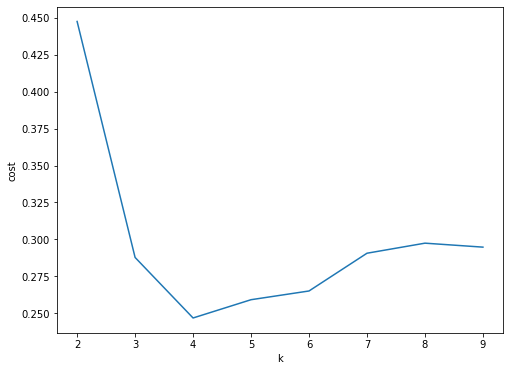

In [0]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

##Your work 
Set the best paramethers for the clustering algorithm. May we used gridsearch? What approach can we use to tunne our model?

Try others clustering methodologies available in pyspark. Explain how the model tunning is carried out and what are the hyperparameter to tune. Provide a data visualization of the silouette score for all of them.

To submmit : 

1. Jupyter notebook with all the code well comented.
2. Pdf document with the main graphique and explanations of them, as well as the comparative analyses of the different non supervised approaches studied.